In [1]:
from tkinter import *
from tkinter import filedialog, ttk
from tkinter.ttk import Combobox
from tkinter.ttk import *
import math as m
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageTk, Image
import PIL
import cv2

from pipeline import Slot_Annotation_pipeline, pipeline_init

cuda
numebr of points 1
aana hrsm []


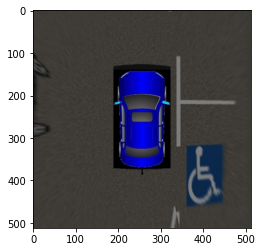

In [2]:
root = Tk()
root.title('MAIN MENU')
root.geometry('250x200')

wlc = Label(root, text="______WELCOME______\n              . . . . .")
entry_mode = Label(root, text="\tChoose a Bird Eye View image\nwith parking road markings to detect them\nand classify them according to their type \nand vacancy state.")
Next = Button(root, text="NEXT",
              command=lambda: [root.withdraw(), Input_window()])

wlc.grid(row=0, columnspan=3, pady=15)

entry_mode.grid(row=1, columnspan=3, padx=10, pady=10)
Next.grid(row=5,columnspan=3, pady=15)


pipeline_init()


def Input_window():
    input_file = filedialog.askopenfile(title='Please Select Image',
                                        filetypes=[("Image", [".png",".jpg",".jpeg"])])

    if input_file is None:
        root.deiconify()
        return
    
    in_image = cv2.imread(input_file.name)
    
    out_image = Slot_Annotation_pipeline(in_image)
    
    view_image(out_image,root)
    
    
    
    
def view_image(im, parent):
    rt = Tk()
    rt.protocol("WM_DELETE_WINDOW", lambda: [rt.destroy(), parent.deiconify()])
    im = Image.fromarray(im)
    photo = ImageTk.PhotoImage(im, master=rt)
    
    label = Label(rt, image=photo)
    label.image = photo
    label.grid(row=0)


root.mainloop()